# Project 4 - 로이터 뉴스 데이터

단어의 수에 따라 모델의 성능이 어떻게 변하는지 확인하기

---

## Importing Dependencies

In [2]:
import tensorflow
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import reuters
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from keras.preprocessing import sequence

print('done!')

done!


## 1. 모든 단어 사용

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print('train 샘플의 수:{}'.format(len(x_train)), end='\n\n')
print('test 샘플의 수:{}'.format(len(x_test)))

train 샘플의 수:8982

test 샘플의 수:2246


#### data 확인하기

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


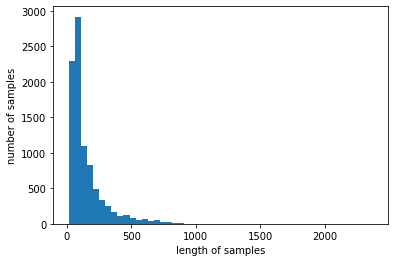

In [ ]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

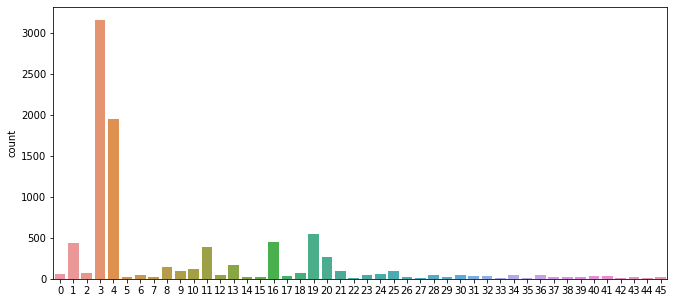

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11, 5)
sns.countplot(x=y_train)
plt.show()

3, 4번 클래스가 대부분을 차지하고 있고 그 뒤로는 19번, 16번, 1번, 11번 등이 높은 분포를 가지고 있다.<br/>(num_words=10000 으로 설정했을 때와 변화 없다)

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('각 클래스 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


#### data 복원하기

In [ ]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

565248/550378 [==============================] - 0s 0us/step


In [ ]:
index_to_word = {index+3: word for word, index in word_index.items()}
print(index_to_word[5])

of


In [ ]:
for index, token in enumerate(('<pad>', '<sos>', '<unk>')):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


전체 train, test data 복원

In [ ]:
decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
decoded = []
for i in range(len(x_test)):
  t = ' '.join([index_to_word[index] for index in x_test[i]])
  decoded.append(t)

x_test = decoded
print(len(x_test))

2246


#### DTM

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


#### TF-IDF Matrix

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


test data 변환

In [ ]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM 을 TF-IDF 행렬로 변환

### 모델별 정확도 예측

In [ ]:
# 결과값 비교를 위한 리스트
classifier_list = ['MultinomialNB', 'ComplementNB', 'Logistic Regression', 'LinearSVC', 'Decision Tree', 
                   'Random Forest', 'GradientBoostingClassifier', 'Voting']
classifier_score_list = []

#### 나이브 베이즈 분류기 Multinomial Naive Bayes Classifier

In [ ]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

predicted = model.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted)) #예측값과 실제값 비교

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.5997328584149599


#### Complement Naive Bayes Classifier(CNB)

In [ ]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7649154051647373


#### 로지스틱 회귀 Logistic Regression

parameter
* penalty: 규제에 사용된 기준을 지정 (l1, l2, elasticnet, none) - default:l2
* C: 규제 강도

In [ ]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test)

print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7649154051647373


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 선형 서포트 벡터 머신 Linear Support Vector Machine

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7804986642920748


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### 결정 트리 Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.6211041852181657


#### 랜덤 포레스트 Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.6544968833481746


#### 그래디언트 부스팅 트리 GradientBoostingClassifier

In [ ]:
grbt = GradientBoostingClassifier(random_state=0, verbose=3)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

      Iter       Train Loss   Remaining Time 
         1           1.4301           20.40m
         2       76760.8864           19.18m
         3   766490025.2967           18.70m
         4 660857139232122368.0000           18.79m
         5 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           18.92m
         6 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           18.81m
         7 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           18.78m
         8 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           18.72m
         9 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584

#### 보팅 Voting

In [ ]:
voting_classifier = VotingClassifier(estimators=[
                                                 ('lr', LogisticRegression(C=10000, penalty='l2')),
                                                 ('cb', ComplementNB()),
                                                 ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.8187889581478184


#### accuracy 비교

In [ ]:
print('Accuracy when 빈도수 제한없음', end='\n\n')
for x in range(len(classifier_list)):
  print(classifier_list[x], ':', classifier_score_list[x].round(3), end='\n\n')

Accuracy when 빈도수 제한없음

MultinomialNB : 0.6

ComplementNB : 0.765

Logistic Regression : 0.765

LinearSVC : 0.78

Decision Tree : 0.621

Random Forest : 0.654

GradientBoostingClassifier : 0.77

Voting : 0.819



**정확도 높은 순서** <br/>
Voting > LinearSVC > GradientBoostingClassifier > ComplementNB, Logistic Regression > Random Forest > Decision Tree > MultinomiaNB

## 2. 빈도수 상위 5,000개

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print('train 샘플의 수:{}'.format(len(x_train)), end='\n\n')
print('test 샘플의 수:{}'.format(len(x_test)))

train 샘플의 수:8982

test 샘플의 수:2246


#### data 확인하기

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


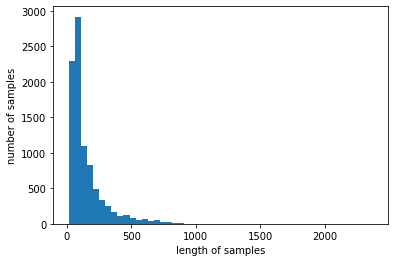

In [4]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

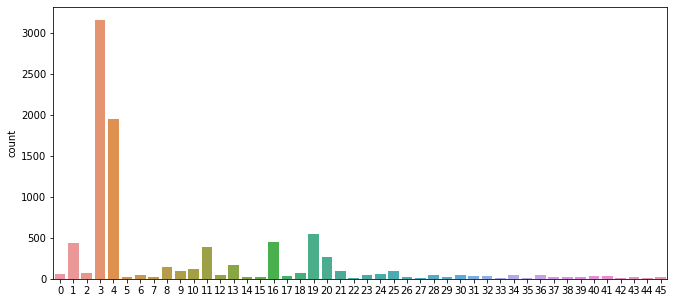

In [5]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11, 5)
sns.countplot(x=y_train)
plt.show()

3, 4번 클래스가 대부분을 차지하고 있고 그 뒤로는 19번, 16번, 1번, 11번 등이 높은 분포를 가지고 있다.<br/>(num_words=10000 으로 설정했을 때와 변화 없다)

In [6]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('각 클래스 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


#### data 복원하기

In [7]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

565248/550378 [==============================] - 0s 0us/step


In [8]:
index_to_word = {index+3: word for word, index in word_index.items()}
print(index_to_word[5])

of


In [9]:
for index, token in enumerate(('<pad>', '<sos>', '<unk>')):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


전체 train, test data 복원

In [10]:
decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [11]:
decoded = []
for i in range(len(x_test)):
  t = ' '.join([index_to_word[index] for index in x_test[i]])
  decoded.append(t)

x_test = decoded
print(len(x_test))

2246


#### DTM

In [12]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


#### TF-IDF Matrix

In [13]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


test data 변환

In [14]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM 을 TF-IDF 행렬로 변환

### 모델별 정확도 예측

In [15]:
# 결과값 비교를 위한 리스트
classifier_list = ['MultinomialNB', 'ComplementNB', 'Logistic Regression', 'LinearSVC', 'Decision Tree', 
                   'Random Forest', 'GradientBoostingClassifier', 'Voting']
classifier_score_list = []

#### 나이브 베이즈 분류기 Multinomial Naive Bayes Classifier

In [16]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

predicted = model.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted)) #예측값과 실제값 비교

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.6731967943009796


#### Complement Naive Bayes Classifier(CNB)

In [17]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7707034728406055


#### 로지스틱 회귀 Logistic Regression

parameter
* penalty: 규제에 사용된 기준을 지정 (l1, l2, elasticnet, none) - default:l2
* C: 규제 강도

In [18]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test)

print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 선형 서포트 벡터 머신 Linear Support Vector Machine

In [19]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7666963490650045


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### 결정 트리 Decision Tree

In [20]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.6179875333926982


#### 랜덤 포레스트 Random Forest

In [21]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.701246660730187


#### 그래디언트 부스팅 트리 GradientBoostingClassifier

In [22]:
grbt = GradientBoostingClassifier(random_state=0, verbose=3)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

      Iter       Train Loss   Remaining Time 
         1           1.4697           14.57m
         2     2131099.0239           14.55m
         3 113352934366748750033493137947714414201794552363528671409179356940992512.0000           14.43m
         4 645005367195105573487290209089081189090170195029150070319832395667206596719018218881024.0000           14.27m
         5 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           14.08m
         6 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           13.93m
         7 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           13.77m
         8 44306729953030165998037436352594999562969554969155989028586935092359272354521328055415871220420274508866530693

#### 보팅 Voting

In [23]:
voting_classifier = VotingClassifier(estimators=[
                                                 ('lr', LogisticRegression(C=10000, penalty='l2')),
                                                 ('cb', ComplementNB()),
                                                 ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.8161175422974176


#### accuracy 비교

In [26]:
print('Accuracy when 빈도수 상위 5,000개', end='\n\n')
for x in range(len(classifier_list)):
  print(classifier_list[x], ':', classifier_score_list[x].round(3), end='\n\n')

Accuracy when 빈도수 상위 5,000개

MultinomialNB : 0.673

ComplementNB : 0.771

Logistic Regression : 0.771

LinearSVC : 0.767

Decision Tree : 0.618

Random Forest : 0.701

GradientBoostingClassifier : 0.768

Voting : 0.816



**정확도 높은 순서** <br/>
Voting > GradientBoostingClassifier > ComplementNB, Logistic Regression > LinearSVC > Random Forest > MultinomiaNB > Decision Tree

## 3. 빈도수 상위 7,000개

In [27]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7000, test_split=0.2)

In [28]:
print('train 샘플의 수:{}'.format(len(x_train)), end='\n\n')
print('test 샘플의 수:{}'.format(len(x_test)))

train 샘플의 수:8982

test 샘플의 수:2246


#### data 확인하기

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


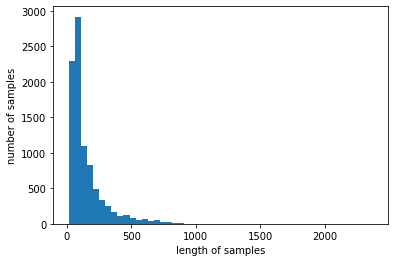

In [29]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

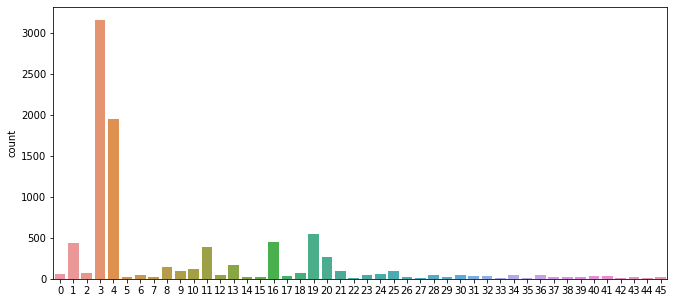

In [30]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11, 5)
sns.countplot(x=y_train)
plt.show()

3, 4번 클래스가 대부분을 차지하고 있고 그 뒤로는 19번, 16번, 1번, 11번 등이 높은 분포를 가지고 있다.<br/>(num_words=10000 으로 설정했을 때와 변화 없다)

In [31]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('각 클래스 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


#### data 복원하기

In [32]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

In [33]:
index_to_word = {index+3: word for word, index in word_index.items()}
print(index_to_word[5])

of


In [34]:
for index, token in enumerate(('<pad>', '<sos>', '<unk>')):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


전체 train, test data 복원

In [35]:
decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [36]:
decoded = []
for i in range(len(x_test)):
  t = ' '.join([index_to_word[index] for index in x_test[i]])
  decoded.append(t)

x_test = decoded
print(len(x_test))

2246


#### DTM

In [37]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 6807)


#### TF-IDF Matrix

In [38]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 6807)


test data 변환

In [39]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM 을 TF-IDF 행렬로 변환

### 모델별 정확도 예측

In [40]:
# 결과값 비교를 위한 리스트
classifier_list = ['MultinomialNB', 'ComplementNB', 'Logistic Regression', 'LinearSVC', 'Decision Tree', 
                   'Random Forest', 'GradientBoostingClassifier', 'Voting']
classifier_score_list = []

#### 나이브 베이즈 분류기 Multinomial Naive Bayes Classifier

In [41]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

predicted = model.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted)) #예측값과 실제값 비교

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.6647373107747105


#### Complement Naive Bayes Classifier(CNB)

In [42]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7684772929652716


#### 로지스틱 회귀 Logistic Regression

parameter
* penalty: 규제에 사용된 기준을 지정 (l1, l2, elasticnet, none) - default:l2
* C: 규제 강도

In [43]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test)

print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7684772929652716


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 선형 서포트 벡터 머신 Linear Support Vector Machine

In [44]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.7729296527159395


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### 결정 트리 Decision Tree

In [45]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.6206589492430988


#### 랜덤 포레스트 Random Forest

In [46]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.6736420302760463


#### 그래디언트 부스팅 트리 GradientBoostingClassifier

In [47]:
grbt = GradientBoostingClassifier(random_state=0, verbose=3)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

      Iter       Train Loss   Remaining Time 
         1           1.4702           14.29m
         2       66877.7080           14.38m
         3 889935379239589.0000           14.31m
         4 473359652203823424.0000           14.21m
         5 5684890459610620717999549779132711970496885722902391376835471286389172216935743488.0000           14.10m
         6 5684890459610620717999549779132711970496885722902391376835471286389172216935743488.0000           13.96m
         7 24726776950066592341950498667020400738329317895488375303073597129553646484008730624.0000           13.81m
         8 24726776950066592341950498667020400738329317895488375303073597129553646484008730624.0000           13.65m
         9 24726776950066592341950498667020400738329317895488375303073597129553646484008730624.0000           13.50m
        10 24726776950066592341950498667020400738329317895488375303073597129553646484008730624.0000           13.37m
        11 2472677695006659234195049866702040073832931789548837

#### 보팅 Voting

In [48]:
voting_classifier = VotingClassifier(estimators=[
                                                 ('lr', LogisticRegression(C=10000, penalty='l2')),
                                                 ('cb', ComplementNB()),
                                                 ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

classifier_score_list.append(accuracy_score(y_test, predicted))

accuracy: 0.815227070347284


#### accuracy 비교

In [50]:
print('Accuracy when 빈도수 상위 7,000개', end='\n\n')
for x in range(len(classifier_list)):
  print(classifier_list[x], ':', classifier_score_list[x].round(3), end='\n\n')

Accuracy when 빈도수 상위 7,000개

MultinomialNB : 0.665

ComplementNB : 0.768

Logistic Regression : 0.768

LinearSVC : 0.773

Decision Tree : 0.621

Random Forest : 0.674

GradientBoostingClassifier : 0.76

Voting : 0.815



**정확도 높은 순서** <br/>
Voting > LinearSVC > ComplementNB, Logistic Regression > GradientBoostingClassifier > Random Forest > MultinomialNB > Decision Tree

## 딥러닝 모델과 비교

In [59]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [60]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8982,) (8982,)
(2246,) (2246,)


In [61]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=30000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [62]:
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

In [63]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(30000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                1920064   
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 46)                2990      
                                                                 
Total params: 1,927,214
Trainable params: 1,927,214
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
x_val = x_train[:2000]
partial_x_train = x_train[2000:]

y_val = one_hot_train_labels[:2000]
partial_y_train = one_hot_train_labels[2000:]

In [66]:
history = model.fit(partial_x_train, partial_y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/15
110/110 [==============================] - 2s 18ms/step - loss: 3.7665 - accuracy: 0.3178 - val_loss: 3.7035 - val_accuracy: 0.3400
Epoch 2/15
110/110 [==============================] - 2s 16ms/step - loss: 3.6444 - accuracy: 0.3551 - val_loss: 3.5858 - val_accuracy: 0.3400
Epoch 3/15
110/110 [==============================] - 2s 17ms/step - loss: 3.5288 - accuracy: 0.3551 - val_loss: 3.4750 - val_accuracy: 0.3400
Epoch 4/15
110/110 [==============================] - 2s 16ms/step - loss: 3.4205 - accuracy: 0.3551 - val_loss: 3.3706 - val_accuracy: 0.3400
Epoch 5/15
110/110 [==============================] - 2s 16ms/step - loss: 3.3192 - accuracy: 0.3551 - val_loss: 3.2738 - val_accuracy: 0.3400
Epoch 6/15
110/110 [==============================] - 2s 16ms/step - loss: 3.2248 - accuracy: 0.3551 - val_loss: 3.1838 - val_accuracy: 0.3400
Epoch 7/15
110/110 [==============================] - 2s 16ms/step - loss: 3.1370 - accuracy: 0.3551 - val_loss: 3.1002 - val_accuracy: 0.3400

In [67]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 2.6450 - accuracy: 0.3620


[2.645042896270752, 0.36197686195373535]

---

## 회고

accuracy 비교

| models | 제한 없음 | 상위 7,000개 | 상위 5,000개 |
|:--------|:--------:|:--------:|:--------:|
| MultinomialNB | 0.6 | 0.665 | 0.673 |
| ComplementNB | 0.765 | 0.768 | 0.771 |
| Logistic Regression | 0.765 | 0.768 | 0.771 |
| LinearSVC | 0.78 | 0.773 | 0.767 |
| Decision Tree | 0.621 | 0.621 | 0.618 |
| Random Forest | 0.654 | 0.674 | 0.701 |
| GradientBoostingClassifier | 0.77 | 0.76 | 0.768 |
| Voting | 0.819 | 0.815 | 0.816 |

단어 수의 설정마다 각 모델의 accuracy의 변화가 있었지만 (당연하게도) 매번 `Voting` 이 가장 좋은 accuracy 를 유지했다.<br/>
`GradientBoostingClassifier`이나 `Voting`의 경우 다소 시간이 걸렸지만 의외로 빨랐던 `LinearSVC`가 `GradientBoostingClassifier`와 비슷하거나 더 나은 accuracy 가 나왔다.<br/>
시간 관계상 다른 딥러닝 모델을 사용해보지 못한 것이 아쉽다. 다른 딥러닝 모델을 적용하여 비교해보면 좋을 것 같다.